### Whether the client has subscribed a term deposit or not With Logistic Regression 

#### Importing the Libearies 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt 
import seaborn as sns 

In [2]:
url = 'F://Data_Set/bank-full.csv'

In [3]:
data = pd.read_csv(url,sep=';')   

In [4]:
data.head()  

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
dataset = data.copy() 

Drop Unwanted Columns 

In [7]:
dataset_1 = dataset.copy() 

In [8]:
dataset_1.drop(['age','job','marital','education','default','contact','day','month','duration','campaign',
               'pdays','previous','poutcome'],axis=1,inplace=True)  

In [9]:
dataset_1.head() 

,balance,housing,loan,y
0,2143,yes,no,no
1,29,yes,no,no
2,2,yes,yes,no
3,1506,yes,no,no
4,1,no,no,no


In [10]:
dataset_1.shape 

(45211, 4)

Chek any Null Value Present in Our Dataset or Not 

In [11]:
dataset_1.isnull().sum() 

balance    0
housing    0
loan       0
y          0
dtype: int64

#### Visualizing the Given Dataset 

Graphical Representation of housing Column Using Histogram 

(array([25130.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 20081.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

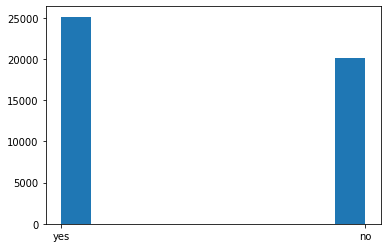

In [12]:
plt.hist(dataset['housing']) 

Graphical Representation of housing Column Using Histogram 

(array([37967.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  7244.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

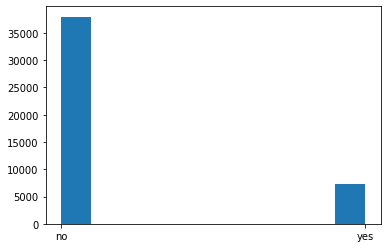

In [13]:
plt.hist(dataset['loan'])  

Check any Outlier Present in the Dataset or Not by Using the BoxPlot 

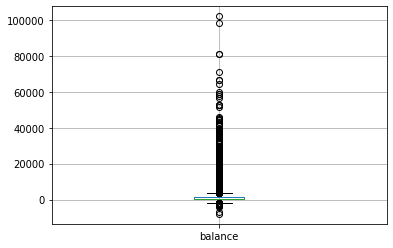

In [14]:
dataset.boxplot('balance') 

#### Removing Outliers of the Independent Variable X 

Remove Outlier of balance Column 

In [13]:
Upper_limit = dataset_1.balance.mean()+1*dataset_1.balance.std() 
print('Upper Limit of balance Column = {}'.format(Upper_limit))

Lower_limit = dataset_1.balance.mean()-1*dataset_1.balance.std()
print('Lower Limit of balance Column = {}'.format(Lower_limit)) 

balance_outlier = dataset_1[(dataset_1.balance>Upper_limit) | (dataset_1.balance<Lower_limit)] 

#Outliers in the Balance Column
#Balance_outlier 
print('Outliers Shape of balance Columns is = {}'.format(balance_outlier.shape))

new_Dataset = dataset_1[(dataset_1.balance<Upper_limit) &(dataset_1.balance>Lower_limit)]

print('Shape of new_Dataset1 is = {}'.format(new_Dataset.shape ))
#new_Dataset.shape

Upper Limit of balance Column = 4407.037886853677
Lower Limit of balance Column = -1682.4937714835237
Outliers Shape of balance Columns is = (3475, 4)
Shape of new_Dataset1 is = (41736, 4)


#### Divide the Dataset into Dependent and Independent Variable 

Independent Variable 

In [14]:
x = new_Dataset.drop(['y'],axis='columns')  

Dependent Variable 

In [15]:
y = new_Dataset['y']  

Convert Categorical Data into Numerical 

In [16]:
 from sklearn.preprocessing import LabelEncoder 

In [17]:
le_housing = LabelEncoder() 

In [18]:
le_loan = LabelEncoder() 

In [19]:
x['housing_n'] = le_housing.fit_transform(x['housing']) 

In [20]:
x['loan_n'] = le_loan.fit_transform(x['loan']) 

In [21]:
x.head() 

,balance,housing,loan,housing_n,loan_n
0,2143,yes,no,1,0
1,29,yes,no,1,0
2,2,yes,yes,1,1
3,1506,yes,no,1,0
4,1,no,no,0,0


In [22]:
le = LabelEncoder() 

In [23]:
y = le.fit_transform(y)  

In [24]:
y 

array([0, 0, 0, ..., 1, 0, 0])

Drop Unwanted Categorical Columns of the X Variable

In [25]:
x_n = x.drop(['housing','loan'],axis='columns')  

In [26]:
x_n.head(2) 

,balance,housing_n,loan_n
0,2143,1,0
1,29,1,0


#### Applying the Logistic Regression Algorithm on the Dataset 

In [27]:
from sklearn.linear_model import LogisticRegression 

In [28]:
logistic_classifier = LogisticRegression() 

Train the Model 

In [29]:
logistic_classifier.fit(x_n,y) 

LogisticRegression()

#### Predict the Result 

In [30]:
y_pred = logistic_classifier.predict(x_n)  

In [31]:
y_pred 

array([0, 0, 0, ..., 0, 0, 0])

Diffrence between Actual Result and Predicted Result 

In [32]:
y_pred_df = pd.DataFrame({'actual':y,'Predicted_values':logistic_classifier.predict(x_n)})   

In [33]:
y_pred_df 

,actual,Predicted_values
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
41731,1,0
41732,1,0
41733,1,0
41734,0,0


#### Confusion Matrix of the Model 

In [34]:
from sklearn.metrics import confusion_matrix 

In [35]:
cm = confusion_matrix(y,y_pred) 

In [36]:
cm 

array([[36987,     0],
       [ 4749,     0]], dtype=int64)

#### Accuracy of the Model

In [37]:
from sklearn.metrics import accuracy_score 

In [38]:
ac =accuracy_score(y,y_pred) 

In [39]:
ac 

0.886213341000575

#### ROC Curve

In [38]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score 

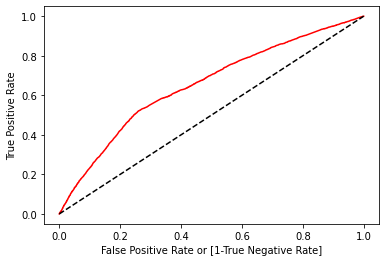

In [39]:
fpr, tpr, threshold = roc_curve(y,logistic_classifier.predict_proba(x_n)[:,1])
auc = roc_auc_score(y,y_pred)  

import matplotlib.pyplot as plt 

plt.plot(fpr,tpr,color='red',label='logit model (area = #0.2f)'%auc)
plt.plot([0,1],[0,1],'k--') 
plt.xlabel('False Positive Rate or [1-True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show() 